In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [8]:
colnames=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']

pd.set_option('display.max_columns', None) # To display all the columns

In [110]:
def load_data(filepath):
    df = pd.read_table(filepath, names=colnames, skiprows=8)
    df.drop(df.shape[0]-1, inplace=True)
    return df

In [111]:
# rootdir = 'small_dataset_iot23'
rootdir = '/content/drive/MyDrive/IOT_23/'

all_dfs = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = os.path.join(subdir, file)
        if filepath.endswith('conn.log.labeled'):
            curr_df = load_data(filepath)
            all_dfs.append(curr_df)

for df in all_dfs:
    print(df.shape)

<ipython-input-110-cb0bb00acf59>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(filepath, names=colnames, skiprows=8)
<ipython-input-110-cb0bb00acf59>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(filepath, names=colnames, skiprows=8)


(452, 21)
(1374, 21)
(130, 21)
(1008748, 21)
(3209, 21)
(3286, 21)
(156103, 21)
(23145, 21)
(4426, 21)
(237, 21)
(10403, 21)


In [129]:
df_merged = pd.concat(all_dfs, ignore_index=True)
print(df_merged.shape)

(1211513, 21)


In [130]:
df_merged.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1540469302.538640,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687.0,216.239.35.4,123.0,udp,-,0.114184,48,48,SF,-,-,0.0,Dd,1.0,76.0,1.0,76.0,- benign -
1,1540469197.400159,CnaDAG3n5r8eiG4su2,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,-,160.367579,7536,0,S0,-,-,0.0,D,24.0,8208.0,0.0,0.0,- benign -
2,1540469385.734089,CUrxU238nt0m6yTgKf,192.168.1.132,32893.0,216.239.35.8,123.0,udp,-,0.016986,48,48,SF,-,-,0.0,Dd,1.0,76.0,1.0,76.0,- benign -
3,1540469831.302625,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,-,0.003497,0,0,SF,-,-,0.0,ShAFf,5.0,212.0,3.0,144.0,- benign -
4,1540469831.265405,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801.0,192.168.1.1,53.0,udp,dns,0.036724,34,311,SF,-,-,0.0,Dd,1.0,62.0,1.0,339.0,- benign -


In [131]:
df_merged['label'].value_counts()

(empty)   Malicious   PartOfAHorizontalPortScan    685062
(empty)   Benign   -                               475992
-   Malicious   DDoS                                14395
-   Benign   -                                      13019
(empty)   Malicious   C&C                            8238
-   Malicious   C&C                                  6720
(empty)   Malicious   Attack                         5962
-   benign   -                                       1956
-   Malicious   PartOfAHorizontalPortScan             122
-   Malicious   C&C-Torii                              30
-   Malicious   C&C-FileDownload                       14
-   Malicious   FileDownload                            3
Name: label, dtype: int64

In [132]:
df_merged.isnull().sum()

ts               0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
local_orig       0
local_resp       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [133]:
df_merged.loc[(df_merged.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_merged.loc[(df_merged.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_merged.loc[(df_merged.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_merged.loc[(df_merged.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_merged.loc[(df_merged.label == '-   Benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '-   benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_merged.loc[(df_merged.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_merged.loc[(df_merged.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_merged.loc[(df_merged.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_merged.loc[(df_merged.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_merged.loc[(df_merged.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_merged.loc[(df_merged.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [134]:
df_merged['label'].value_counts()

PartOfAHorizontalPortScan    685184
Benign                       490967
C&C                           14958
DDoS                          14395
Attack                         5962
C&C-Torii                        30
C&C-FileDownload                 14
FileDownload                      3
Name: label, dtype: int64

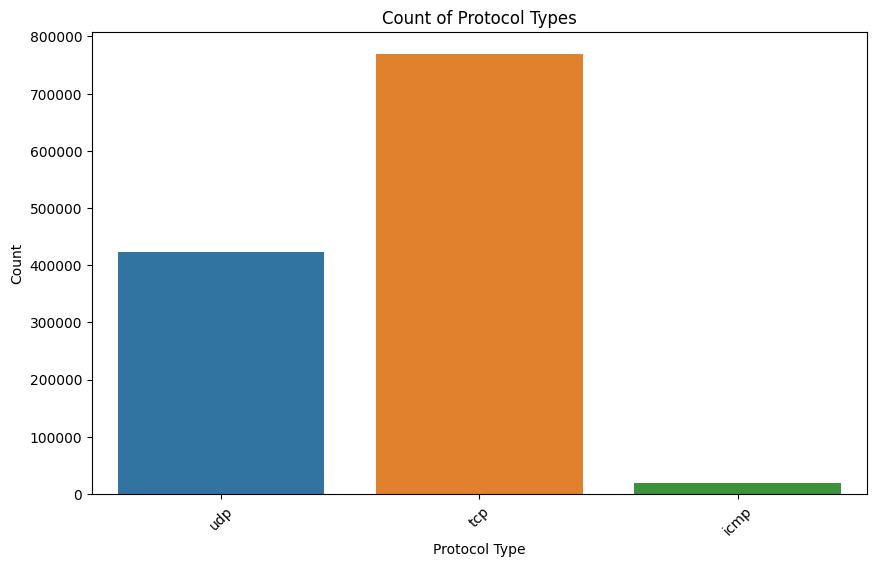

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for protocol types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='proto')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Count of Protocol Types')
plt.xticks(rotation=45)
plt.show()


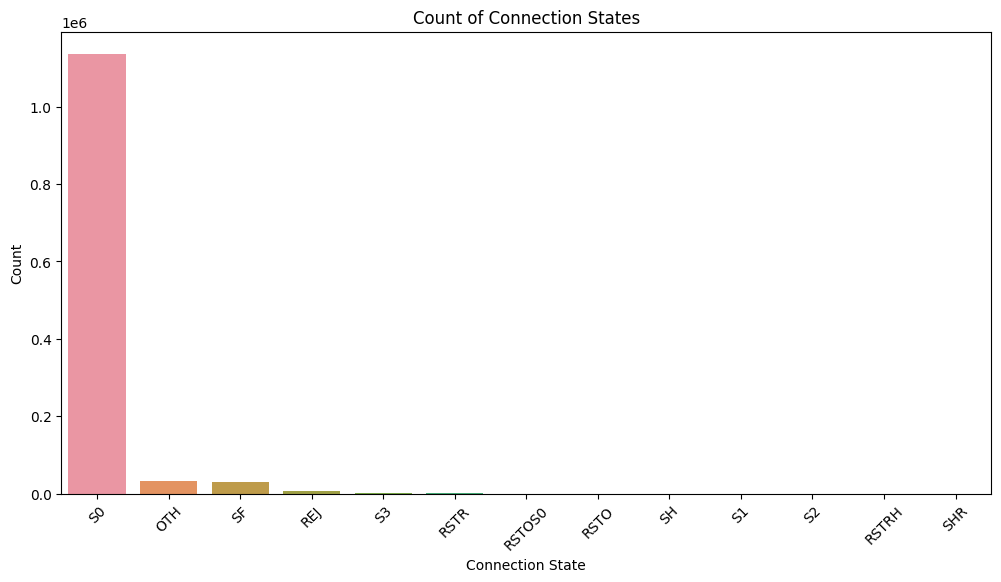

In [136]:
# Bar plot for connection state
plt.figure(figsize=(12, 6))
conn_state_counts = df_merged['conn_state'].value_counts()
sns.barplot(x=conn_state_counts.index, y=conn_state_counts.values)
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.title('Count of Connection States')
plt.xticks(rotation=45)
plt.show()


Updated DataFrame:
                  ts                 uid      id.orig_h  id.orig_p  \
0  1540469302.538640  CGm6jB4dXK71ZDWUDh  192.168.1.132    58687.0   
1  1540469197.400159  CnaDAG3n5r8eiG4su2  192.168.1.132     1900.0   
2  1540469385.734089  CUrxU238nt0m6yTgKf  192.168.1.132    32893.0   
3  1540469831.302625  CGQf8t1kjdxB5PHXL4  192.168.1.132    53395.0   
4  1540469831.265405  CUo9DH2QDnCaBIGjkg  192.168.1.132    52801.0   

         id.resp_h  id.resp_p  proto service    duration orig_bytes  \
0     216.239.35.4      123.0      2       -    0.114184         48   
1  239.255.255.250     1900.0      2       -  160.367579       7536   
2     216.239.35.8      123.0      2       -    0.016986         48   
3       2.16.60.82      443.0      1       -    0.003497          0   
4      192.168.1.1       53.0      2     dns    0.036724         34   

  resp_bytes  conn_state local_orig local_resp  missed_bytes history  \
0         48          10          -          -           0.0 

<ipython-input-137-b9eba08d464a>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


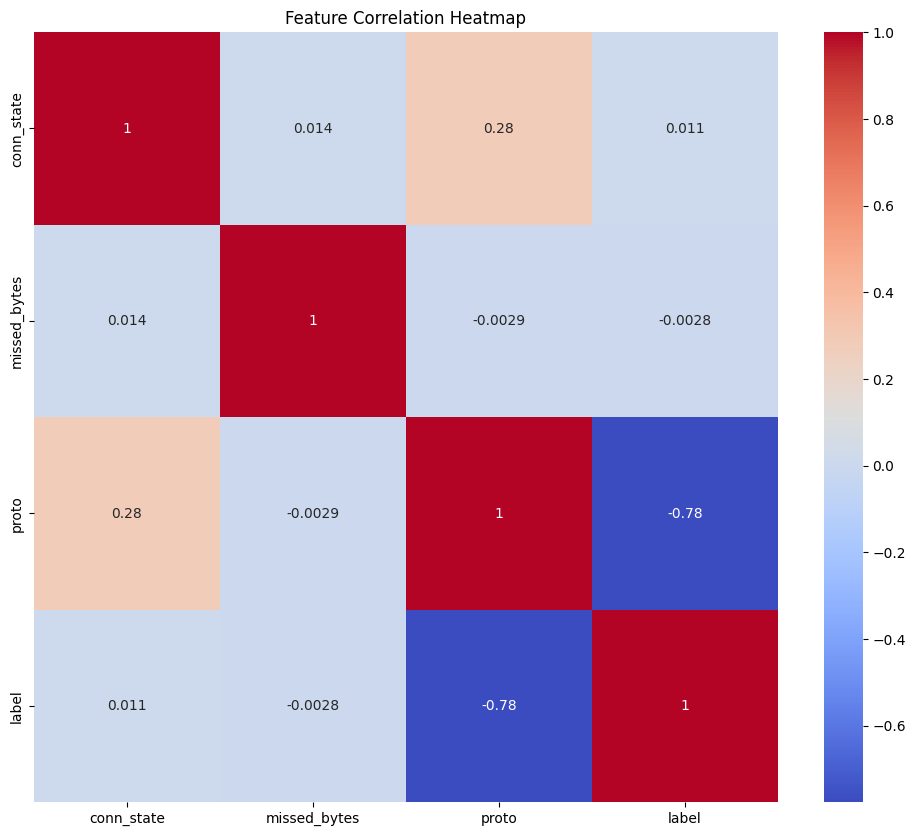

In [137]:

from sklearn.preprocessing import LabelEncoder

# Select categorical columns to label encode
categorical_columns = ['proto','label','conn_state']

# Create a new DataFrame for the updated dataset
updated_df = df_merged.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode each categorical column
for col in categorical_columns:
    updated_df[col] = label_encoder.fit_transform(updated_df[col])

# Display the updated DataFrame
print("Updated DataFrame:")
print(updated_df.head())


df1=updated_df[['conn_state', 'missed_bytes','proto','resp_bytes','label']]
# Compute the correlation matrix
corr_matrix = df1.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [138]:


non_useful_columns = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp']
non_useful_columns = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'history']

df_merged.drop(non_useful_columns, axis=1, inplace=True)
df_merged.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,udp,-,0.114184,48,48,SF,0.0,1.0,76.0,1.0,76.0,Benign
1,udp,-,160.367579,7536,0,S0,0.0,24.0,8208.0,0.0,0.0,Benign
2,udp,-,0.016986,48,48,SF,0.0,1.0,76.0,1.0,76.0,Benign
3,tcp,-,0.003497,0,0,SF,0.0,5.0,212.0,3.0,144.0,Benign
4,udp,dns,0.036724,34,311,SF,0.0,1.0,62.0,1.0,339.0,Benign


In [139]:
def subsample(df):
    df_benign = df[df['label'] == 'Benign']
    df_malicious = df[df['label'] != 'Benign']

    print('Before subsampling: ', df_benign.shape, df_malicious.shape)

    df_malicious = df_malicious.sample(len(df_benign), random_state = 0)
    df = pd.concat([df_malicious, df_benign])
    df = df.sample(frac=1, random_state=0)

    print('After subsampling: ', df_benign.shape, df_malicious.shape)

    return df

In [140]:
df_merged = subsample(df_merged)
print(df_merged.shape)

Before subsampling:  (490967, 12) (720546, 12)
After subsampling:  (490967, 12) (490967, 12)
(981934, 12)


Benign                       490967
PartOfAHorizontalPortScan    466928
C&C                           10184
DDoS                           9763
Attack                         4059
C&C-Torii                        21
C&C-FileDownload                 10
FileDownload                      2
Name: label, dtype: int64


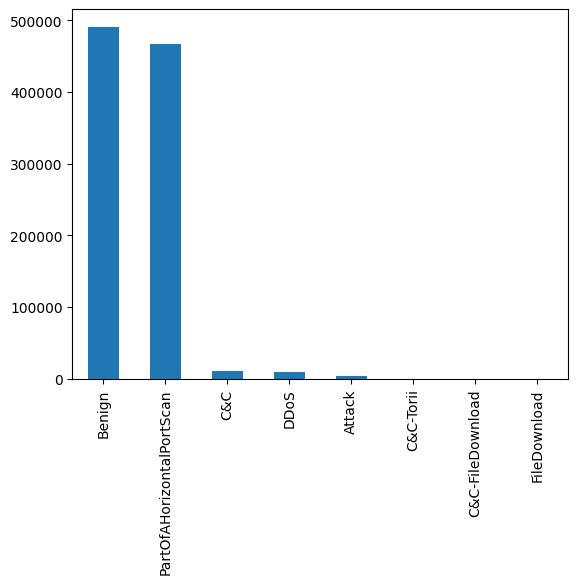

In [141]:
print(df_merged['label'].value_counts())
df_merged['label'].value_counts().plot(kind='bar')
plt.show()

In [142]:

print(df_merged.isna().sum())
print()
df_merged.replace('-', np.nan, inplace=True)
print(df_merged.isna().sum())

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

proto                 0
service          968837
duration         755295
orig_bytes       755295
resp_bytes       755295
conn_state            0
missed_bytes          0
orig_pkts             0
orig_ip_bytes         0
resp_pkts             0
resp_ip_bytes         0
label                 0
dtype: int64


In [143]:
# Make 'proto', 'service', 'conn_state', 'history' as One-Hot Encoded
print(df_merged.columns)

def encode(df, column_name):
    dummies = pd.get_dummies(df[[column_name]], dummy_na=True) # Also create a NaN column for NaN values
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([column_name], axis=1)
    return res

# columns_to_encode = ['proto', 'service', 'conn_state', 'history']
columns_to_encode = ['proto', 'service', 'conn_state']

for column in columns_to_encode:
    df_merged = encode(df_merged, column)

print(df_merged.columns)

Index(['proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label'],
      dtype='object')
Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'proto_nan', 'service_dhcp', 'service_dns',
       'service_http', 'service_irc', 'service_ssh', 'service_ssl',
       'service_nan', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR', 'conn_state_nan'],
      dtype='object')


In [144]:
print(df_merged.shape)
df_merged.tail()

(981934, 34)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,proto_nan,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_nan
793160,2.998790,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1011910,NaN,NaN,NaN,0.0,1.0,76.0,0.0,0.0,Benign,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
615834,NaN,NaN,NaN,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1128351,NaN,NaN,NaN,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1194397,32.718375,62,269,0.0,7.0,434.0,6.0,589.0,C&C,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [145]:
# Get the list of those columns which contain NaN values and replace NaN values with median
nan_columns = df_merged.columns[df_merged.isna().any()].tolist()
print('Before replacing, the columns containing NaN values:', nan_columns)

for column in nan_columns:
    df_merged[column].fillna(df_merged[column].median(), inplace=True)

nan_columns = df_merged.columns[df_merged.isna().any()].tolist()
print('After replacing, the columns containing NaN values:', nan_columns)

print(df_merged.shape)
df_merged.tail()

Before replacing, the columns containing NaN values: ['duration', 'orig_bytes', 'resp_bytes']
After replacing, the columns containing NaN values: []
(981934, 34)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,proto_nan,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_nan
793160,2.998790,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1011910,2.998788,0.0,0.0,0.0,1.0,76.0,0.0,0.0,Benign,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
615834,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1128351,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1194397,32.718375,62,269,0.0,7.0,434.0,6.0,589.0,C&C,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [146]:
# Remove columns which contain only 0 values
empty_columns = df_merged.columns[(df_merged == 0).all()]
print(empty_columns)
df_merged.drop(empty_columns, axis=1, inplace=True)
print(df_merged.shape)
df_merged.head()

Index(['proto_nan', 'conn_state_nan'], dtype='object')
(981934, 32)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
62412,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
938478,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
20907,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
770467,2.998788,0.0,0.0,0.0,1.0,40.0,0.0,0.0,Benign,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
815591,2.998791,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [147]:
# Reset index
df_merged.reset_index(drop=True, inplace=True)

In [148]:
# Extract X and Y (labels) of dataset
Y = df_merged[['label']]
print(Y.shape)
Y.tail()

(981934, 1)


,label
981929,PartOfAHorizontalPortScan
981930,Benign
981931,PartOfAHorizontalPortScan
981932,PartOfAHorizontalPortScan
981933,C&C


In [149]:
X = df_merged.drop(['label'], axis=1)
print(X.shape)
X.tail()

(981934, 31)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
981929,2.998790,0,0,0.0,3.0,180.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
981930,2.998788,0.0,0.0,0.0,1.0,76.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
981931,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
981932,2.998788,0.0,0.0,0.0,1.0,60.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
981933,32.718375,62,269,0.0,7.0,434.0,6.0,589.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [150]:
x = X.values
standard_scaler = StandardScaler()

x_scaled = standard_scaler.fit_transform(x)

X = pd.DataFrame(x_scaled, columns=X.columns)
X.tail()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,proto_tcp,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
981929,-0.003720,-0.001016,-0.001073,-0.004806,-0.000088,-0.000968,-0.002057,-0.001105,-0.139576,0.904699,-0.870294,-0.013541,-0.072654,-0.050431,-0.034033,-0.064315,-0.009521,0.116268,-0.172815,-0.074452,-0.012278,-0.014021,-0.037077,-0.006845,0.263746,-0.008444,-0.007817,-0.045086,-0.164825,-0.011595,-0.003908
981930,-0.003720,-0.001016,-0.001073,-0.004806,-0.001600,-0.001026,-0.002057,-0.001105,-0.139576,-1.105340,1.149038,-0.013541,-0.072654,-0.050431,-0.034033,-0.064315,-0.009521,0.116268,-0.172815,-0.074452,-0.012278,-0.014021,-0.037077,-0.006845,0.263746,-0.008444,-0.007817,-0.045086,-0.164825,-0.011595,-0.003908
981931,-0.003720,-0.001016,-0.001073,-0.004806,-0.001600,-0.001035,-0.002057,-0.001105,-0.139576,0.904699,-0.870294,-0.013541,-0.072654,-0.050431,-0.034033,-0.064315,-0.009521,0.116268,-0.172815,-0.074452,-0.012278,-0.014021,-0.037077,-0.006845,0.263746,-0.008444,-0.007817,-0.045086,-0.164825,-0.011595,-0.003908
981932,-0.003720,-0.001016,-0.001073,-0.004806,-0.001600,-0.001035,-0.002057,-0.001105,-0.139576,0.904699,-0.870294,-0.013541,-0.072654,-0.050431,-0.034033,-0.064315,-0.009521,0.116268,-0.172815,-0.074452,-0.012278,-0.014021,-0.037077,-0.006845,0.263746,-0.008444,-0.007817,-0.045086,-0.164825,-0.011595,-0.003908
981933,0.167791,-0.000981,-0.000281,-0.004806,0.002935,-0.000827,0.022693,0.000564,-0.139576,0.904699,-0.870294,-0.013541,-0.072654,-0.050431,29.383303,-0.064315,-0.009521,-8.600812,-0.172815,-0.074452,-0.012278,-0.014021,-0.037077,-0.006845,-3.791521,-0.008444,-0.007817,22.179692,-0.164825,-0.011595,-0.003908


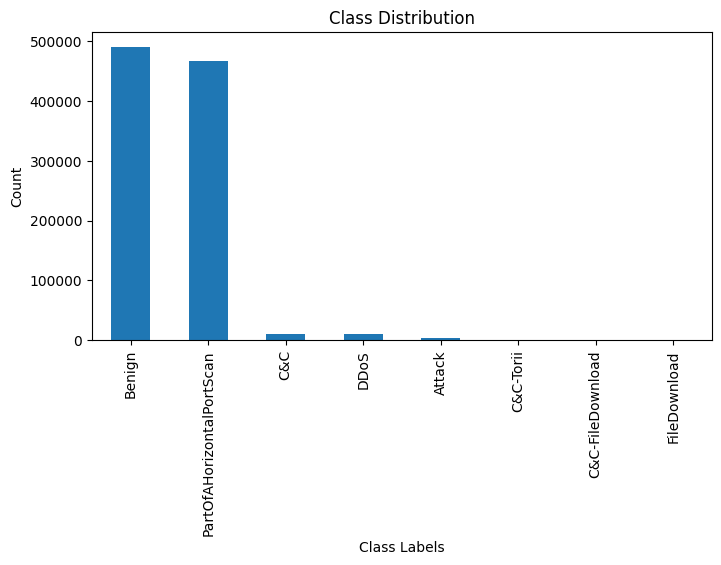

In [151]:


# Count the occurrences of each class label
class_counts = df_merged['label'].value_counts()

# Plot the class distribution using a bar chart
plt.figure(figsize=(8, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [152]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
attack_n = []
for i in df_merged.label :
  if i == 'Benign':
    attack_n.append("Benign")
  else:
    attack_n.append("malicious")
df_merged['label'] = attack_n

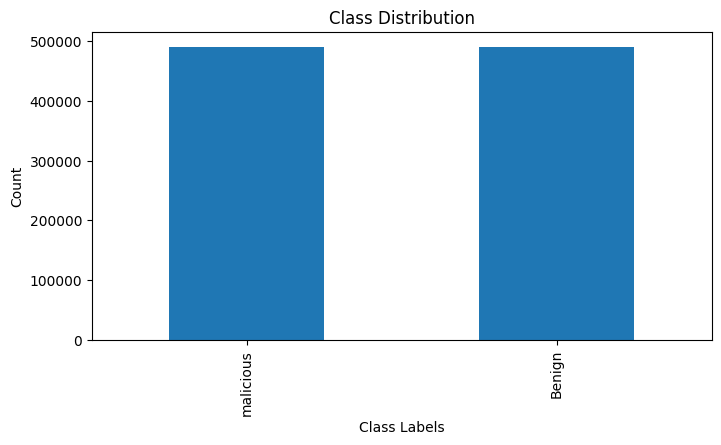

In [154]:


# Count the occurrences of each class label
class_counts = df_merged['label'].value_counts()

# Plot the class distribution using a bar chart
plt.figure(figsize=(8, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


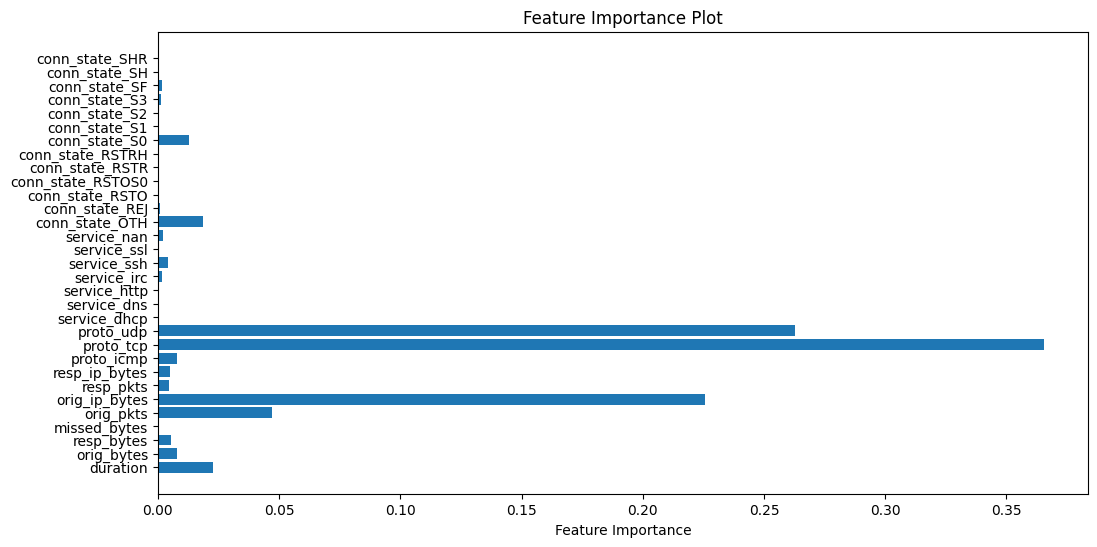

In [155]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, Y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X.columns)  # Assuming df is your DataFrame
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


In [156]:

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [157]:
classes = df_merged['label'].copy()
features = df_merged.drop(['label'], axis=1)

# Encode the class labels
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)

x_train, x_test, y_train, y_test = train_test_split(features,encoded_classes , test_size=0.1, random_state=40)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [158]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(883740, 31) (98194, 31) (883740,) (98194,)


In [159]:
df_merged.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_http',
       'service_irc', 'service_ssh', 'service_ssl', 'service_nan',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [160]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Set the parameters
input_shape = x_train.shape[1:]
encoding_dim = 32

# Reshape the data for compatibility with Dense layers
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Define the autoencoder model
def Autoencoder(input_shape, encoding_dim):
    input_data = layers.Input(shape=(np.prod(input_shape),))  # Flatten the input
    encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
    decoded = layers.Dense(np.prod(input_shape), activation='sigmoid')(encoded)  # Output has the same shape as input
    return models.Model(inputs=input_data, outputs=decoded)

# Build the autoencoder
autoencoder = Autoencoder(input_shape, encoding_dim)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test))

# Encode the data using the encoder part of the autoencoder
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)
encoded_x_train = encoder.predict(x_train)
encoded_x_test = encoder.predict(x_test)





Epoch 1/10
13809/13809 [==============================] - 35s 2ms/step - loss: -540.0292 - accuracy: 0.9649 - val_loss: -1502.3969 - val_accuracy: 0.9666
Epoch 2/10
13809/13809 [==============================] - 32s 2ms/step - loss: -3271.9641 - accuracy: 0.9660 - val_loss: -5360.7310 - val_accuracy: 0.9665
Epoch 3/10
13809/13809 [==============================] - 32s 2ms/step - loss: -8287.9854 - accuracy: 0.9660 - val_loss: -11457.4209 - val_accuracy: 0.9665
Epoch 4/10
13809/13809 [==============================] - 32s 2ms/step - loss: -15558.3018 - accuracy: 0.9660 - val_loss: -19772.7793 - val_accuracy: 0.9665
Epoch 5/10
13809/13809 [==============================] - 32s 2ms/step - loss: -25053.9746 - accuracy: 0.9659 - val_loss: -30283.2637 - val_accuracy: 0.9665
Epoch 6/10
13809/13809 [==============================] - 35s 3ms/step - loss: -36774.3477 - accuracy: 0.9656 - val_loss: -43026.4023 - val_accuracy: 0.9665
Epoch 7/10
13809/13809 [==============================] - 32s 2m

In [183]:
classifier = models.Sequential([
    layers.Flatten(input_shape=(encoding_dim,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = classifier.fit(encoded_x_train, y_train, epochs=10, batch_size=64, validation_data=(encoded_x_test, y_test))




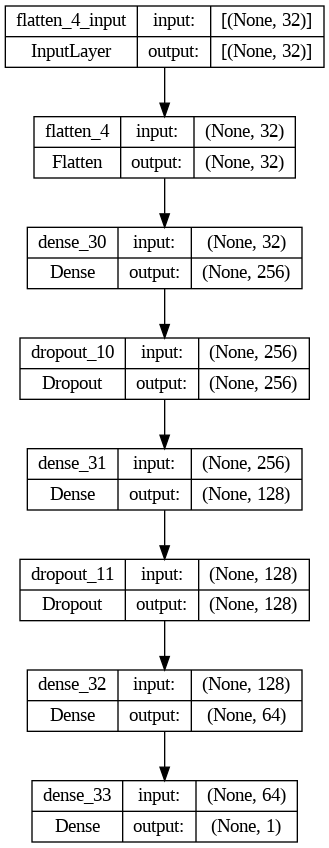

In [184]:
from keras.utils import plot_model

plot_model(classifier, to_file='model.png', show_shapes=True)

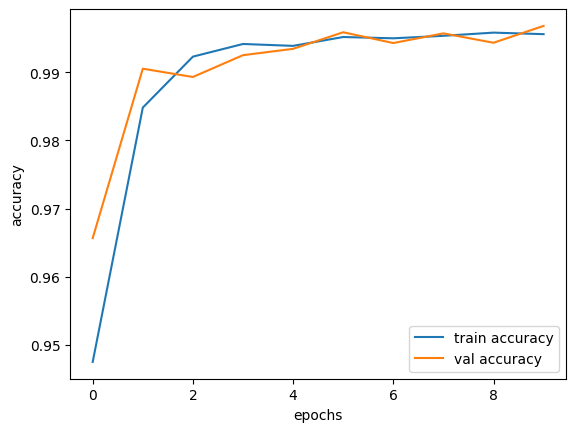

In [ ]:
epochs = list(range(10))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

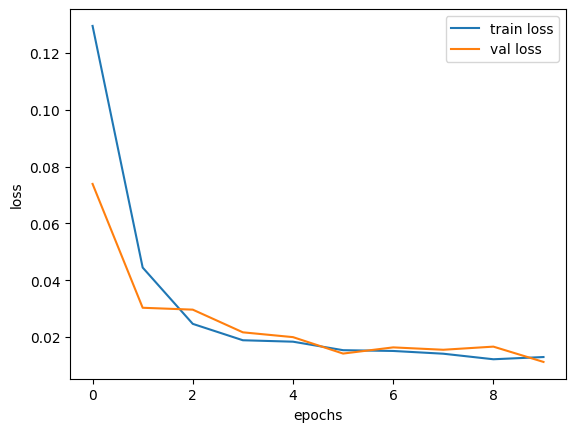

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [166]:

from sklearn.metrics import accuracy_score

In [170]:
y_pred = classifier.predict(encoded_x_test)
accuracy_score(y_test, y_pred > 0.5)

3069/3069 [==============================] - 12s 4ms/step


0.9518402346375542

In [171]:
from sklearn import metrics

In [ ]:
macro_averaged_precision = metrics.precision_score(y_test, ypred>0.5, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.9956205433296956


In [ ]:
macro_averaged_recall = metrics.recall_score(y_test, ypred>0.5, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.995628620577998


In [ ]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred>0.5, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.9956245802726441


In [175]:
!pip install scikit-plot

In [176]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

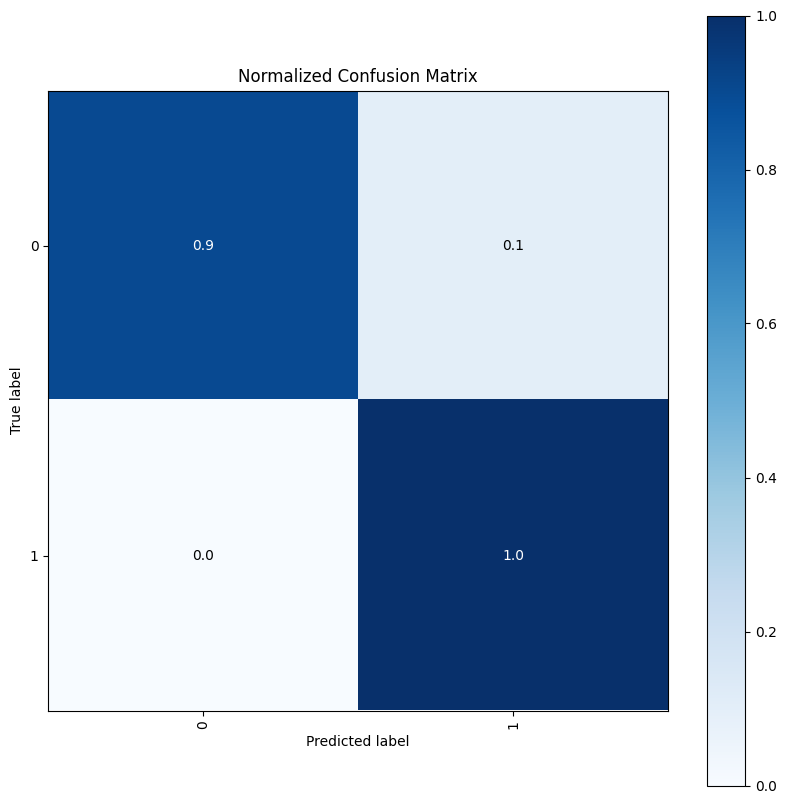

In [177]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(y_test,y_pred > 0.5,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')




In [179]:

from sklearn.metrics import roc_curve

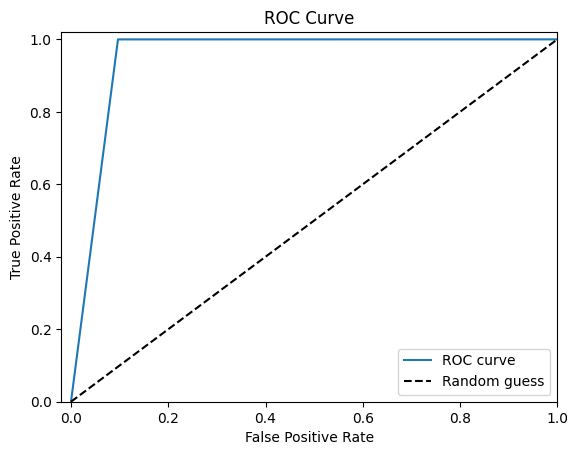

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred>0.5)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")